In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

In [4]:
df = pd.read_csv('Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum().sum()

np.int64(0)

In [8]:
# drop customerId column
df = df.drop(['customerID'], axis=1)

In [10]:
# now, change the total charges to numerical datatypes instead of objects
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
# display the null values of tottalcharges
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [16]:
# drop rows where 'Tenure' is 0
# df = df.drop(lables = df[df['tenure'] == 0])
df = df.drop(index=df[df['tenure'] == 0].index)

In [18]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

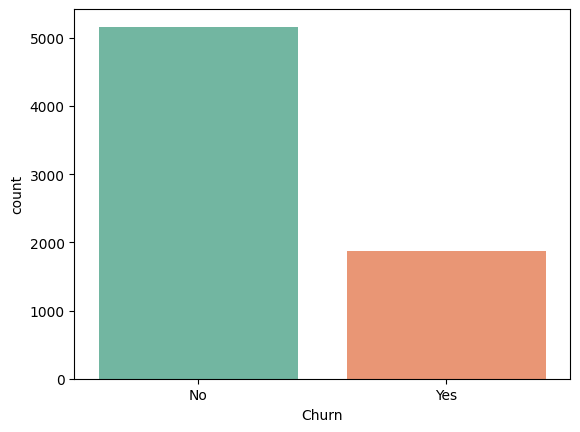

In [28]:
# exploratory data anaysis
sns.countplot(x='Churn', data=df, palette='Set2', hue='Churn', legend=False)

<Axes: xlabel='Churn', ylabel='count'>

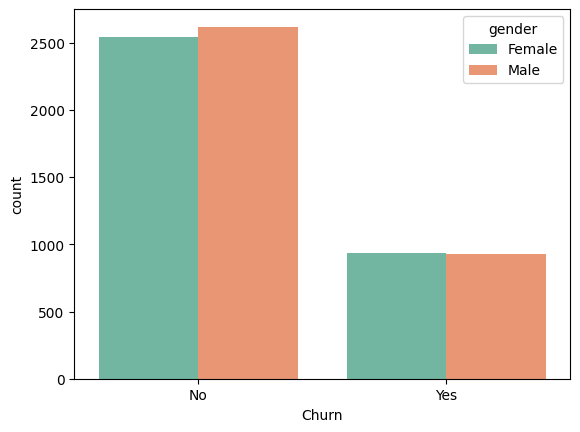

In [31]:
sns.countplot(x='Churn', hue='gender', data=df, palette='Set2')

<Axes: xlabel='Churn', ylabel='count'>

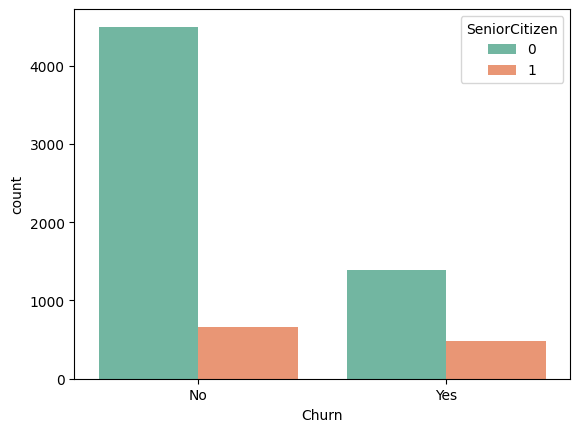

In [34]:
sns.countplot(x='Churn', hue='SeniorCitizen', data=df, palette='Set2')

### senior citizen are more likely to churn

<Axes: xlabel='Churn', ylabel='count'>

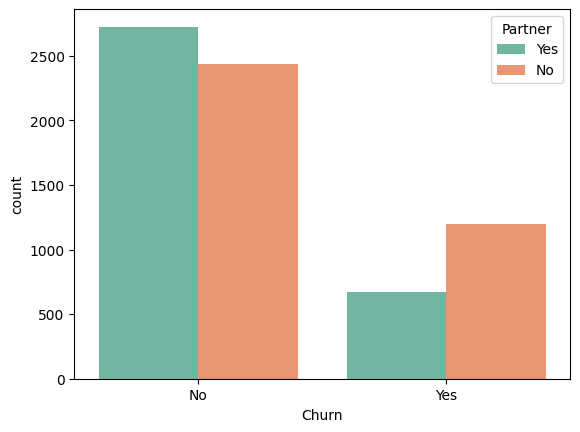

In [36]:
sns.countplot(x='Churn', hue='Partner', data=df, palette='Set2')

### people who doesn't have partner or single person more likely to churn

<Axes: xlabel='Churn', ylabel='count'>

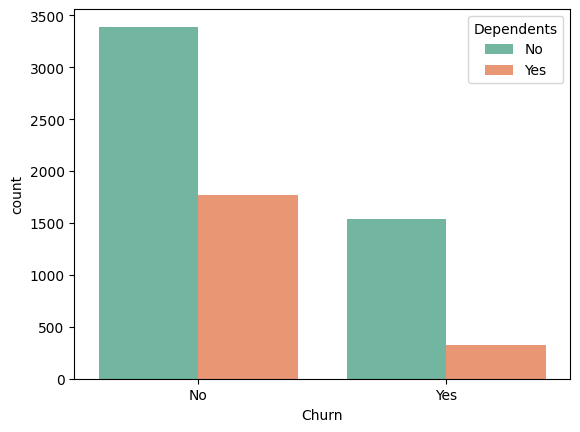

In [37]:
sns.countplot(x='Churn', hue='Dependents', data=df, palette='Set2')

### people who doesn't have any dependents or single preson are more likely to churn
### if the customre has a family, all of them prefer to use same services and retentions is high

<Axes: xlabel='Churn', ylabel='count'>

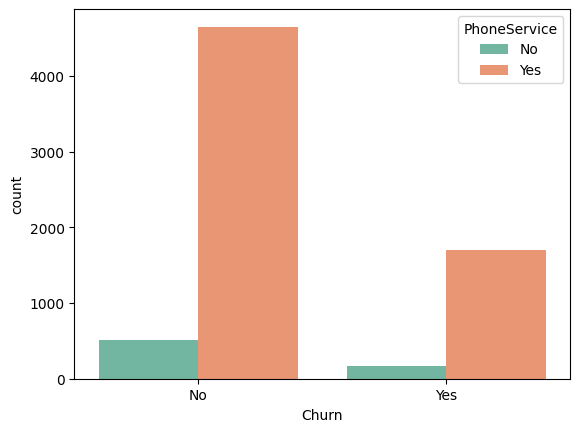

In [40]:
sns.countplot(x='Churn', hue='PhoneService', data=df, palette='Set2')

### people who have phone service are more likely ro churn

<Axes: xlabel='Churn', ylabel='count'>

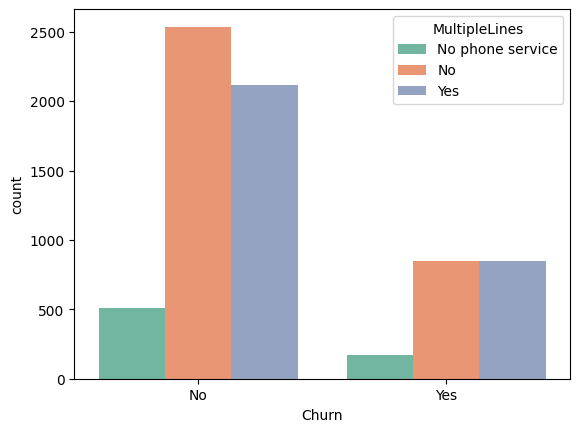

In [42]:
sns.countplot(x='Churn', hue='MultipleLines', data=df, palette='Set2')

<Axes: xlabel='Churn', ylabel='count'>

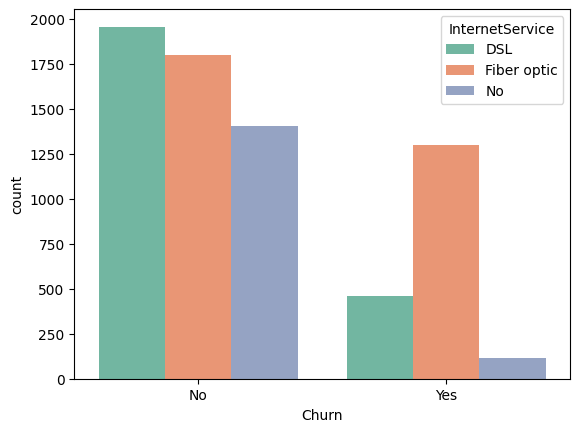

In [43]:
sns.countplot(x='Churn', hue='InternetService', data=df, palette='Set2')

### those who have opted for fiber optics are more likely to churn and on the contrary, those4 who have DSL service have more retention

<Axes: xlabel='Churn', ylabel='count'>

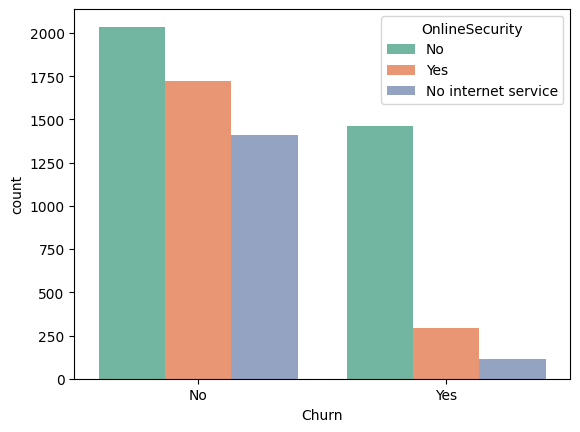

In [44]:
sns.countplot(x='Churn', hue='OnlineSecurity', data=df, palette='Set2')

### people who doesn't have online security are more likely to churn

<Axes: xlabel='Churn', ylabel='count'>

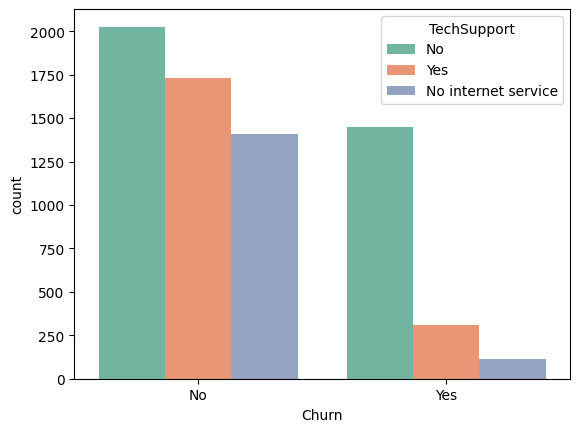

In [48]:
sns.countplot(x='Churn', hue='TechSupport', data=df, palette='Set2')

### people who doesn't have techSupport are more likely to churn

<Axes: xlabel='Churn', ylabel='count'>

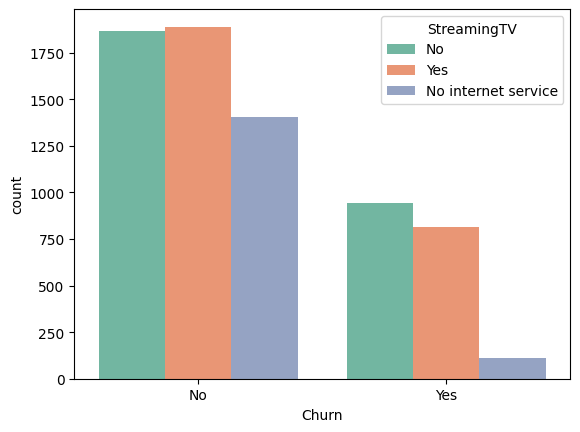

In [49]:
sns.countplot(x='Churn', hue='StreamingTV', data=df, palette='Set2')

<Axes: xlabel='Churn', ylabel='count'>

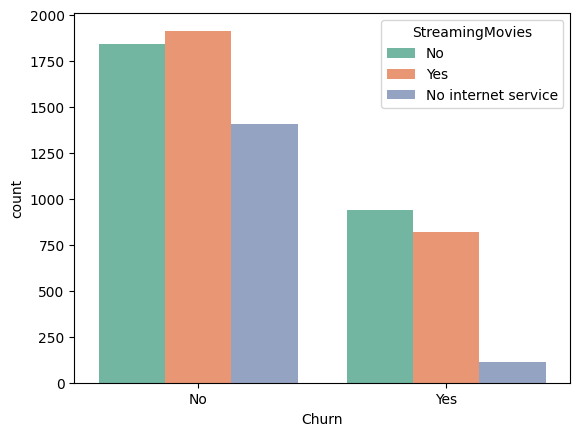

In [50]:
sns.countplot(x='Churn', hue='StreamingMovies', data=df, palette='Set2')

<Axes: xlabel='Churn', ylabel='count'>

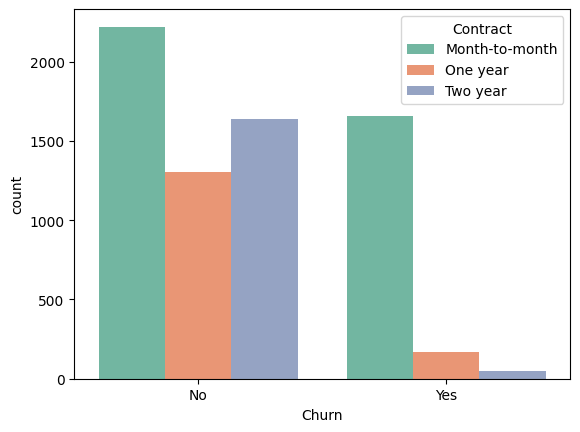

In [51]:
sns.countplot(x='Churn', hue='Contract', data=df, palette='Set2')

### people who are on monthly contract are more likely to churn and people who are on early contract are less likely to churn

<Axes: xlabel='Churn', ylabel='count'>

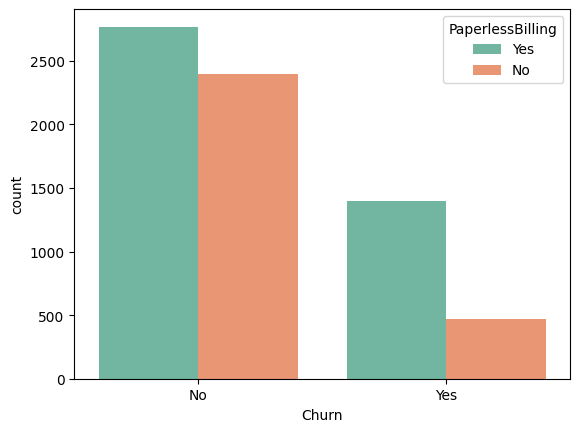

In [52]:
sns.countplot(x='Churn', hue='PaperlessBilling', data=df, palette='Set2')

<Axes: xlabel='Churn', ylabel='count'>

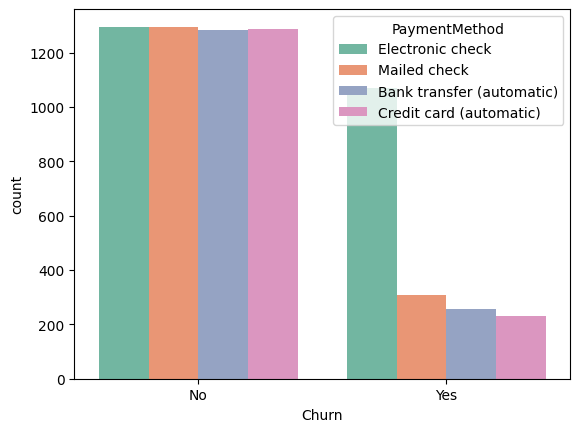

In [54]:
sns.countplot(x='Churn', hue='PaymentMethod', data=df, palette='Set2')

### people who have opted for electronic check payments are more likely to churn

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

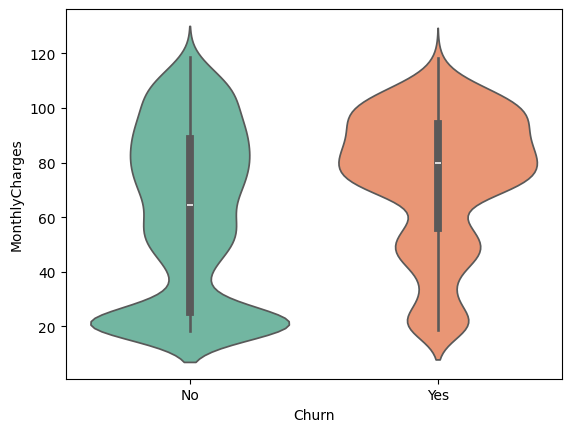

In [59]:
sns.violinplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2', hue='Churn')

### people who have monthly charges are more likely to churn

<Axes: xlabel='Churn', ylabel='TotalCharges'>

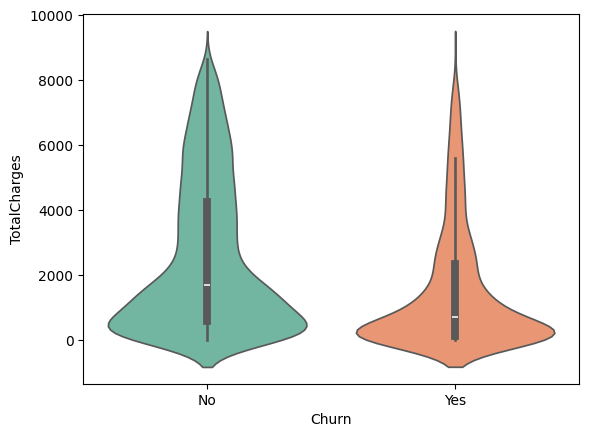

In [60]:
sns.violinplot(x='Churn', y='TotalCharges', data=df, palette='Set2', hue='Churn')

<Axes: xlabel='Churn', ylabel='tenure'>

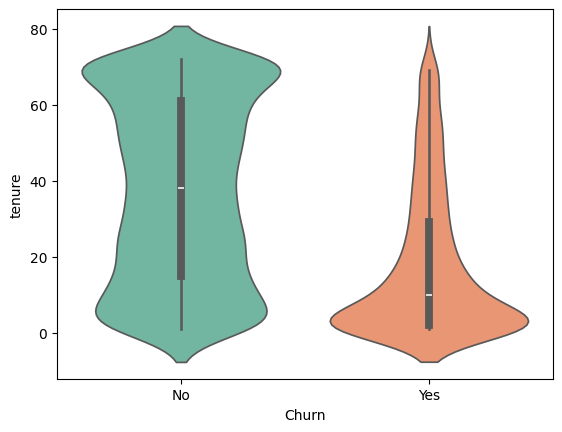

In [64]:
sns.violinplot(x='Churn', y='tenure', data=df, palette='Set2', hue='Churn')

<Axes: xlabel='Churn', ylabel='tenure'>

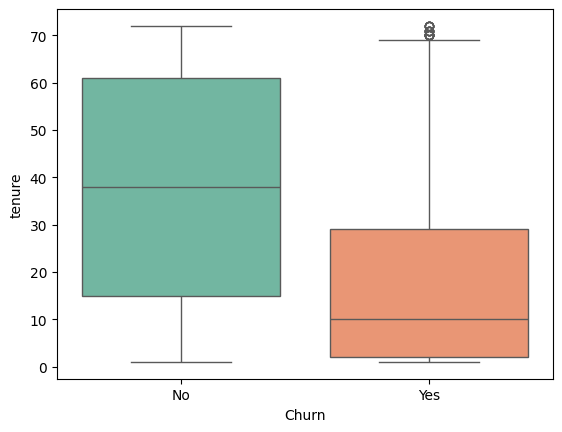

In [66]:
sns.boxplot(x='Churn', y='tenure', data=df, palette='Set2', hue='Churn')

<Axes: xlabel='TotalCharges', ylabel='Density'>

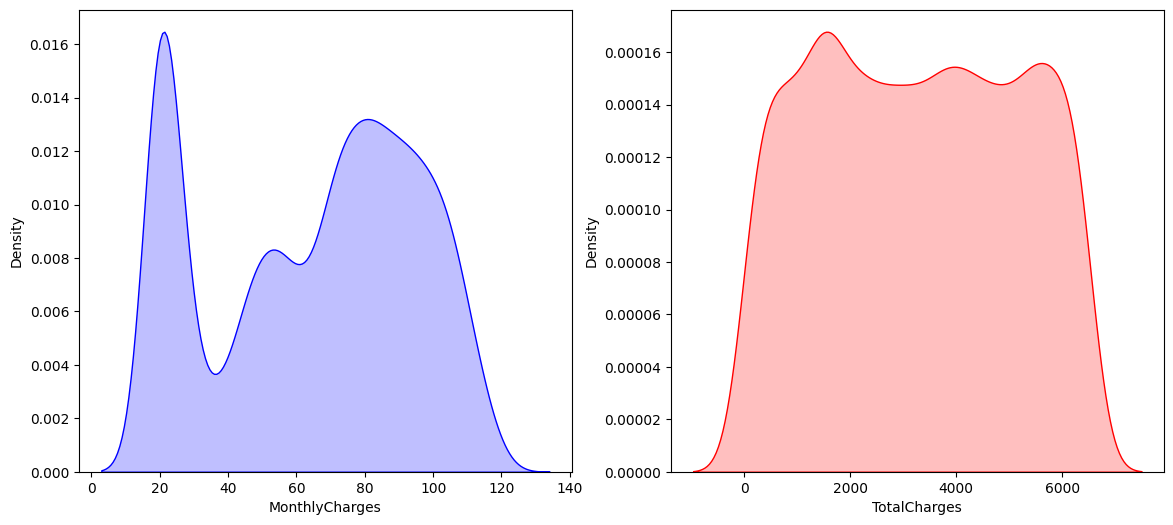

In [20]:
# in subplot (1, 2) is 1 row 2 column
fig, axes = plt.subplots(1, 2, figsize=(14,6))
sns.kdeplot(df['MonthlyCharges'], ax=axes[0], color='blue', fill=True)
sns.kdeplot(df['TotalCharges'], ax=axes[1], color='red', fill=True)

In [8]:
# df.apply(lambda x: pd.factorize(x)[0]).corr() ## can alos try this to see the result
df.apply(lambda x: pd.factorize(x)[0] if x.dtype!='float64' else x) 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,29.85,0,0
1,1,1,0,1,0,1,1,1,0,1,...,1,0,0,0,1,1,1,56.95,1,0
2,2,1,0,1,0,2,1,1,0,1,...,0,0,0,0,0,0,1,53.85,2,1
3,3,1,0,1,0,3,0,0,0,1,...,1,1,0,0,1,1,2,42.30,3,0
4,4,0,0,1,0,2,1,1,1,0,...,0,0,0,0,0,0,0,70.70,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,1,0,0,1,65,1,2,0,1,...,1,1,1,1,1,0,1,84.80,6526,0
7039,7039,0,0,0,1,21,1,2,1,0,...,1,0,1,1,1,0,3,103.20,6527,0
7040,7040,0,0,0,1,26,0,0,0,1,...,0,0,0,0,0,0,0,29.60,6528,0
7041,7041,1,1,0,0,54,1,2,1,0,...,0,0,0,0,0,0,1,74.40,6529,1


<Axes: >

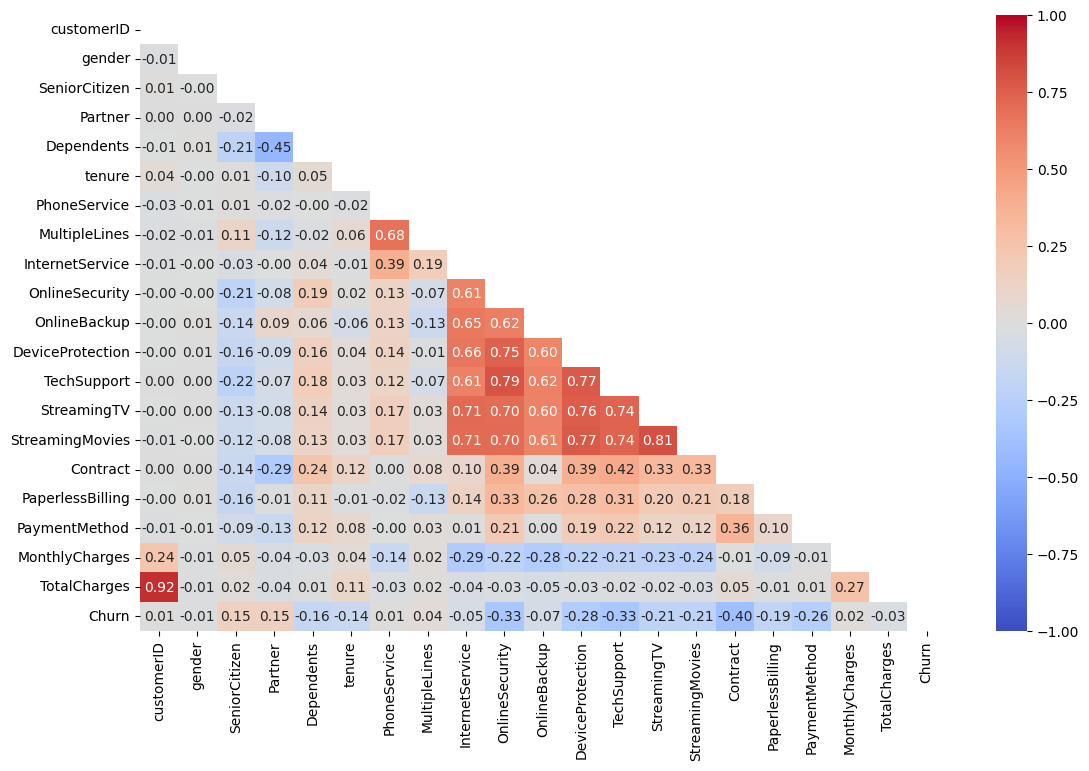

In [11]:
# coorelation matrix
plt.figure(figsize=(13, 8))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
# corr = df.apply(lambda x: pd.factorize(x)[0] if x.dtype!='float64' else x).corr() 
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0, annot=True, fmt='.2f')

In [12]:
#label encoder
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [16]:
categorical_cols = [col for col in df.columns if df[col].dtype=='object'] 
categorical_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [17]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0


In [21]:
# perform log transformation
df['MonthlyCharges'] = np.log(df['MonthlyCharges']+1)
df['TotalCharges'] = np.log(df['TotalCharges']+1)

<Axes: xlabel='TotalCharges', ylabel='Density'>

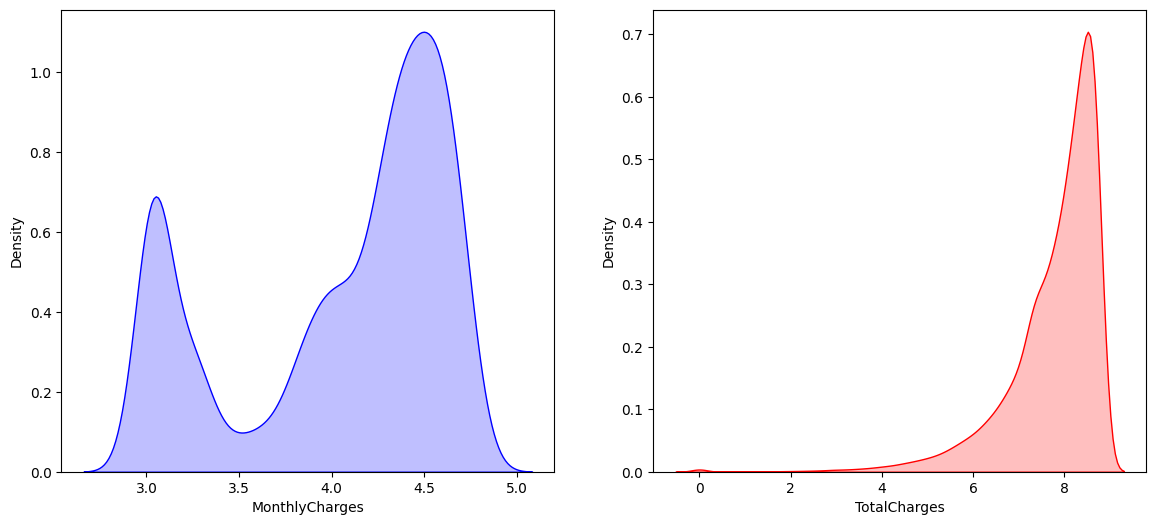

In [22]:
# in subplot (1, 2) is 1 row 2 column
fig, axes = plt.subplots(1, 2, figsize=(14,6))
sns.kdeplot(df['MonthlyCharges'], ax=axes[0], color='blue', fill=True)
sns.kdeplot(df['TotalCharges'], ax=axes[1], color='red', fill=True)

In [32]:
# for train test split, define X and y
X = df.drop(columns=['Churn'])
y = df['Churn']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
# Model Taining
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# scale the model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# initializing model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [39]:
# get predection
y_predection = model.predict(X_test)

print(classification_report(y_test, y_predection, zero_division=1))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1035
           1       1.00      0.00      0.00       374

    accuracy                           0.73      1409
   macro avg       0.87      0.50      0.42      1409
weighted avg       0.81      0.73      0.62      1409



D:\churn-prediction\env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [40]:
# Model Taining
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# scale the model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# initializing model
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# get predection
y_predection = model.predict(X_test)

print(classification_report(y_test, y_predection, zero_division=1))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1035
           1       1.00      0.00      0.00       374

    accuracy                           0.73      1409
   macro avg       0.87      0.50      0.42      1409
weighted avg       0.81      0.73      0.62      1409



D:\churn-prediction\env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
